In [1]:
from RandomForest import RandomForestClassifier as manualRF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon.count()

#             800
Name          799
Type 1        800
Type 2        414
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

## Cek perbedaan stats

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


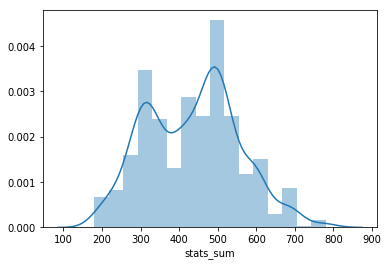

In [4]:
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


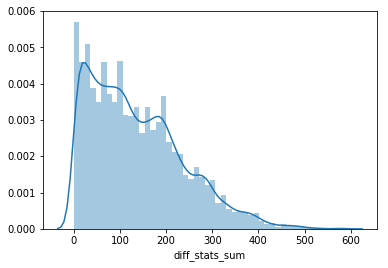

In [5]:
cols = ["First_pokemon","Second_pokemon","Winner"]
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


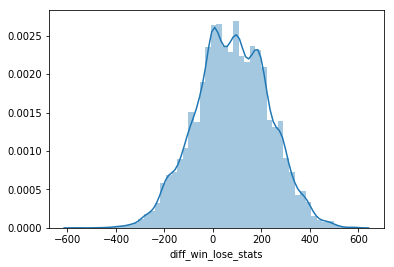

In [6]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.xlabel("diff_win_lose_stats")
plt.show()

In [7]:
print("winner higher stats:",diff_win_lose_stats[diff_win_lose_stats > 0].count())
print("losser higher stats:",diff_win_lose_stats[diff_win_lose_stats < 0].count())
print("same stats:",diff_win_lose_stats[diff_win_lose_stats == 0].count())

winner higher stats: 34531
losser higher stats: 14867
same stats: 602


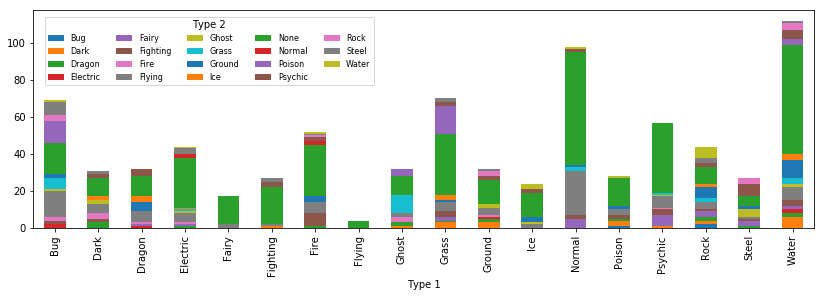

In [8]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

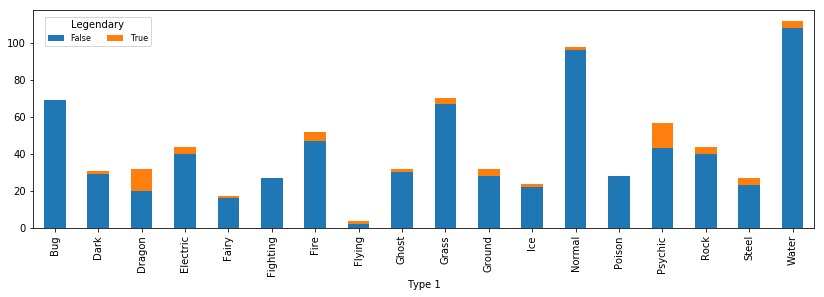

In [9]:
legendary_cross_type1 = pd.crosstab(pokemon["Type 1"], pokemon["Legendary"])
legendary_cross_type1.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Legendary")
plt.show()

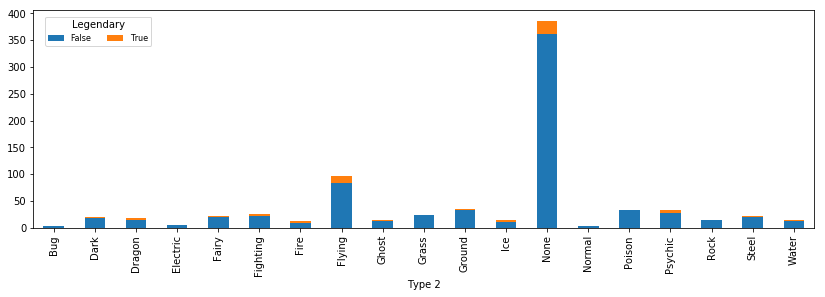

In [10]:
legendary_cross_type2 = pd.crosstab(pokemon["Type 2"], pokemon["Legendary"])
legendary_cross_type2.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Legendary")
plt.show()

In [11]:
pokemon[pokemon['Type 2'] == 'None'][pokemon[pokemon['Type 2'] == 'None']['Legendary']==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum
162,163,Mewtwo,Psychic,None,106,110,90,154,90,130,1,True,680
164,165,Mega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780
262,263,Raikou,Electric,None,90,85,75,115,100,115,2,True,580
263,264,Entei,Fire,None,115,115,85,90,75,100,2,True,580
264,265,Suicune,Water,None,100,75,115,90,115,85,2,True,580
414,415,Regirock,Rock,None,80,100,200,50,100,50,3,True,580
415,416,Regice,Ice,None,80,50,100,100,200,50,3,True,580
416,417,Registeel,Steel,None,80,75,150,75,150,50,3,True,580
421,422,Kyogre,Water,None,100,100,90,150,140,90,3,True,670
422,423,Primal Kyogre,Water,None,100,150,90,180,160,90,3,True,770


In [12]:
pokemon.count()

#             800
Name          799
Type 1        800
Type 2        800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
stats_sum     800
dtype: int64

In [13]:
combats.count()

First_pokemon     50000
Second_pokemon    50000
Winner            50000
dtype: int64

In [14]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
stats_sum      int64
dtype: object

In [15]:
combats_data = combats.copy()
important_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'stats_sum', 'Legendary', 'Type 1', 'Type 2']
important_v2_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'stats_sum']

In [16]:
for f in ['First', 'Second']:
    for i in important_features:
        feature_dict = dict(zip(pokemon['#'], pokemon[i]))
        combats_data["{}_pokemon_{}".format(f,i)] = combats_data["{}_pokemon".format(f)].replace(feature_dict)
combats_data["First_win"] = combats_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)

In [17]:
combats_v2_data = combats.copy()

In [18]:
for i in important_v2_features:
    feature_dict = dict(zip(pokemon['#'], pokemon[i]))
    combats_v2_data['{}_diff'.format(i)] = combats_data["First_pokemon".format(f)].replace(feature_dict) - combats_data["Second_pokemon"].replace(feature_dict)
combats_v2_data["First_win"] = combats_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)

In [19]:
combats_data = combats_data.drop(cols, axis=1)
combats_v2_data = combats_v2_data.drop(cols, axis=1)

In [24]:
combats_data.head()

,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp. Atk,First_pokemon_Sp. Def,First_pokemon_Speed,First_pokemon_stats_sum,First_pokemon_Legendary,First_pokemon_Type 1,First_pokemon_Type 2,...,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_stats_sum,Second_pokemon_Legendary,Second_pokemon_Type 1,Second_pokemon_Type 2,First_win
0,50,64,50,45,50,41,300,False,Rock,Ground,...,70,40,60,40,60,340,False,Grass,Dark,0
1,91,90,72,90,129,108,580,True,Grass,Fighting,...,129,90,72,90,108,580,True,Rock,Fighting,0
2,55,40,85,80,105,40,405,False,Fairy,Flying,...,75,75,125,95,40,485,False,Psychic,None,0
3,40,40,40,70,40,20,250,False,Fire,None,...,120,90,60,90,48,485,False,Dragon,None,0
4,70,60,125,115,70,55,495,False,Rock,Water,...,10,230,10,230,5,505,False,Bug,Rock,1


In [23]:
combats_v2_data.head()

,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,Sp. Def_diff,Speed_diff,stats_sum_diff,First_win
0,-20,-6,10,-15,10,-19,-40,0
1,0,-39,-18,18,39,0,0,0
2,-20,-35,10,-45,10,0,-80,0
3,-37,-80,-50,10,-50,-28,-235,0
4,50,50,-105,105,-160,50,-10,1


In [25]:
for f in ['First', 'Second']:
    feature_dict = dict(zip(pokemon['#'], pokemon['Legendary']))
    combats_v2_data["{}_pokemon_Legendary".format(f)] = combats["{}_pokemon".format(f)].replace(feature_dict)

In [26]:
combats_v2_data.head()

,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,Sp. Def_diff,Speed_diff,stats_sum_diff,First_win,First_pokemon_Legendary,Second_pokemon_Legendary
0,-20,-6,10,-15,10,-19,-40,0,False,False
1,0,-39,-18,18,39,0,0,0,True,True
2,-20,-35,10,-45,10,0,-80,0,False,False
3,-37,-80,-50,10,-50,-28,-235,0,False,False
4,50,50,-105,105,-160,50,-10,1,False,False


In [27]:
combats_v2_data["First_pokemon_Legendary"] = combats_v2_data['First_pokemon_Legendary'].apply(lambda x: 1 if x else 0)

In [28]:
combats_v2_data["Second_pokemon_Legendary"] = combats_v2_data['Second_pokemon_Legendary'].apply(lambda x: 1 if x else 0)

In [24]:
one_hot_encoded = pd.get_dummies(combats_data)

In [29]:
Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 0.5}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Diffender, Column is Attacker")
df_type_relation

Row is Diffender, Column is Attacker


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0
Fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
Fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0
Grass,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


count    50000.000000
mean         1.146062
std          0.869392
min          0.031250
25%          0.500000
50%          1.000000
75%          1.000000
max         16.000000
Name: Relation, dtype: float64


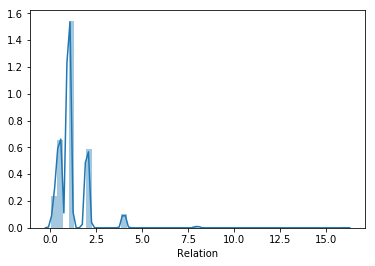

In [30]:
pokemon["Type"] = pokemon.apply(lambda x: x["Type 1"]+"/"+x["Type 2"], axis=1)
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
combats_type = combats[cols].replace(type_dict)
combats_type["Loser"] = combats_type.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)

zero_dict = {0: 0.25}
df_type_relation = df_type_relation[:].replace(zero_dict)

def calcRelation(combats_type):
    r0 = 1
    win_type1 = combats_type["Winner"].split("/")[0]
    win_type2 = combats_type["Winner"].split("/")[1]
    lose_type1 = combats_type["Loser"].split("/")[0]
    lose_type2 = combats_type["Loser"].split("/")[1]
    if win_type2 != "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r3 = df_type_relation[win_type2][lose_type1]
        r4 = df_type_relation[win_type2][lose_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif win_type2 != "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r3 = df_type_relation[win_type2][lose_type1]
        r = r0 * r1 * r3
    elif win_type2 == "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r = r0 * r1 * r2
    elif win_type2 == "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r = r0 * r1
    return r

combats_type["Relation"] = combats_type.apply(lambda x: calcRelation(x), axis = 1)
print (combats_type["Relation"].describe())
sns.distplot(combats_type["Relation"])
plt.show()

In [39]:
combats_type.count()

First_pokemon     50000
Second_pokemon    50000
Winner            50000
Loser             50000
Relation          50000
dtype: int64

In [43]:
combats_v3_data = combats_v2_data.join(combats_type['Relation'])
combats_v3_data.to_csv('combatsv3.csv')

In [35]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [36]:
combats_data[['First_pokemon_HP','Second_pokemon_HP']].head()

,First_pokemon_HP,Second_pokemon_HP
0,50,70
1,91,91
2,55,75
3,40,77
4,70,20


In [40]:
temp = one_hot_encoded[one_hot_encoded['Second_pokemon_Sp. Def'] < 230]
temp[temp['Second_pokemon_Defense'] == 5].count()

First_pokemon_HP                  100
First_pokemon_Attack              100
First_pokemon_Defense             100
First_pokemon_Sp. Atk             100
First_pokemon_Sp. Def             100
First_pokemon_Speed               100
First_pokemon_stats_sum           100
First_pokemon_Legendary           100
Second_pokemon_HP                 100
Second_pokemon_Attack             100
Second_pokemon_Defense            100
Second_pokemon_Sp. Atk            100
Second_pokemon_Sp. Def            100
Second_pokemon_Speed              100
Second_pokemon_stats_sum          100
Second_pokemon_Legendary          100
First_win                         100
First_pokemon_Type 1_Bug          100
First_pokemon_Type 1_Dark         100
First_pokemon_Type 1_Dragon       100
First_pokemon_Type 1_Electric     100
First_pokemon_Type 1_Fairy        100
First_pokemon_Type 1_Fighting     100
First_pokemon_Type 1_Fire         100
First_pokemon_Type 1_Flying       100
First_pokemon_Type 1_Ghost        100
First_pokemo

In [24]:
from sklearn.ensemble import RandomForestClassifier as sklearnRF
from sklearn.model_selection import train_test_split

In [25]:
X = one_hot_encoded.drop(['First_win'], axis=1)
Y = one_hot_encoded['First_win']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9875)

In [26]:
np_X_train = np.array(X_train)
np_y_train = np.array(y_train)
np_X_test = np.array(X_test)
np_y_test = np.array(y_test)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(np_y_train.shape)
print(np_y_train.shape)

(625, 90)
(625,)
(625,)
(625,)


In [28]:
print(y_train[y_train == 0].count())
print(y_train[y_train == 1].count())

321
304


In [29]:
import time

In [30]:
sklearn_start = time.time()
clf_sklearn = sklearnRF(n_estimators=10, max_depth=10).fit(np_X_train, np_y_train)
sklearn_elapsed = time.time() - sklearn_start

manual_start = time.time()
clf_manual = manualRF(n_trees=10, max_depth=10, sample_ratio=0.8)
print(clf_manual)
clf_manual.fit(np_X_train, np_y_train)
manual_elapsed = time.time() - manual_start

start training
Training DT 1
0
{'groups': {'left': {'X': [array([ 76,  65,  45,  92,  42,  91, 411,   0,  70,  20,  50,  20,  50,
        40, 250,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                           array([ 75, 105,  75, 105,  75,  45, 480,   0,  50,  20,  40,  20,  40,
        20, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   

                            array([ 60,  70,  50, 100,  50,  65, 395,   0,  40,  55,  30,  30,  30,
        85, 270,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                            array([ 60,  70,  65, 125, 105,  90, 515,   0,  75,  80,  95,  90, 100,
        50, 490,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,

1
{'groups': {'left': {'X': [array([ 84,  86,  88, 111, 101,  60, 530,   0,  44,  58,  44,  58,  44,
        61, 309,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                           array([ 38,  41,  40,  50,  65,  65, 299,   0,  90,  70,  80,  70,  95,
        70, 475,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,

         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                           array([ 70, 135, 105,  60, 105,  20, 495,   0,  53,  54,  53,  37,  46,
        45, 288,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0]),
                           array([108, 112, 118,  68,  72,  47, 525,   0,  80, 100,  70,  60,  70,
        95, 475,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,

2
{'groups': {'left': {'X': [array([ 84,  86,  88, 111, 101,  60, 530,   0,  44,  58,  44,  58,  44,
        61, 309,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                           array([ 38,  41,  40,  50,  65,  65, 299,   0,  90,  70,  80,  70,  95,
        70, 475,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,

                           array([ 55,  75,  85,  25,  25,  15, 280,   0,  35,  55,  35,  30,  30,
        35, 220,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                           array([ 55,  40,  40,  65,  45,  35, 280,   0,  55,  85, 122,  58,  75,
        99, 494,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  

3
{'groups': {'left': {'X': [array([135,  85,  40,  40,  85,   5, 390,   0,  80,  52,  50,  90,  50,
        89, 411,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                           array([135,  85,  40,  40,  85,   5, 390,   0,  40,  35,  30, 120,  70,
       105, 400,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,

         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                            array([ 57,  24,  86,  24,  86,  23, 300,   0,  50,  30,  55,  65,  55,
        20, 275,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                            array([ 70, 135, 105,  60, 105,  20, 495,   0,  53,  54,  53,  37,  46,
        45, 288,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   

4
{'groups': {'left': {'X': [array([ 50,  70, 100,  40,  40,  30, 330,   0,   1,  90,  45,  30,  30,
        40, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                           array([ 45,  30,  50,  55,  65,  45, 290,   0,  20,  40,  90,  30,  90,
        25, 295,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,

                            array([ 55,  75,  85,  25,  25,  15, 280,   0,  35,  55,  35,  30,  30,
        35, 220,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                            array([ 55,  40,  40,  65,  45,  35, 280,   0,  55,  85, 122,  58,  75,
        99, 494,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,

5
{'groups': {'left': {'X': [array([ 84,  86,  88, 111, 101,  60, 530,   0,  44,  58,  44,  58,  44,
        61, 309,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                           array([ 38,  41,  40,  50,  65,  65, 299,   0,  90,  70,  80,  70,  95,
        70, 475,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,

         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
                           array([ 78, 104,  78, 159, 115, 100, 634,   0,  75,  75,  95,  75,  95,
       113, 528,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]),
                           array([ 39,  52,  43,  60,  50,  65, 309,   0,  50,  53,  48,  53,  48,
        64, 316,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,

KeyboardInterrupt: 

In [58]:
with open('trained_manual.pickle', 'wb') as h:
    pickle.dump(clf_manual, h)

In [70]:
sklearn_predicted = clf_sklearn.predict(np_X_test)
manual_predicted = list()
for i in range(len(np_y_test)):
    manual_predicted.append(clf_manual.predict(np_X_test[i]))
manual_predicted = np.array(manual_predicted)

In [82]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score

In [83]:
tn_sklearn, fp_sklearn, fn_sklearn, tp_sklearn = confusion_matrix(y_test, sklearn_predicted).ravel()
acc_sklearn = accuracy_score(y_test, sklearn_predicted)
f1_score_sklearn = f1_score(y_test, sklearn_predicted)

tn_manual, fp_manual, fn_manual, tp_manual = confusion_matrix(y_test, manual_predicted).ravel()
acc_manual = accuracy_score(y_test, manual_predicted)
f1_score_manual = f1_score(y_test, manual_predicted)

In [86]:
print("SKLEARN:")
print("TP: {}".format(str(tp_sklearn)))
print("TN: {}".format(str(tn_sklearn)))
print("FP: {}".format(str(fp_sklearn)))
print("FN: {}".format(str(fn_sklearn)))
print("Accuracy: {}".format(acc_sklearn))
print("F1 Score: {}".format(f1_score_sklearn))
print("elapsed time: {}".format(sklearn_elapsed))


print("Manual:")
print("TP: {}".format(str(tp_manual)))
print("TN: {}".format(str(tn_manual)))
print("FP: {}".format(str(fp_manual)))
print("FN: {}".format(str(fn_manual)))
print("Accuracy: {}".format(acc_manual))
print("F1 Score: {}".format(f1_score_manual))
print("elapsed time: {}".format(manual_elapsed))

SKLEARN:
TP: 18279
TN: 21221
FP: 4858
FN: 5017
Accuracy: 0.8
F1 Score: 0.7873279779467188
elapsed time: 0.024602413177490234
Manual:
TP: 2617
TN: 25114
FP: 965
FN: 20679
Accuracy: 0.5616405063291139
F1 Score: 0.194731750874321
elapsed time: 1132.2854561805725


In [80]:
from pprint import pprint
pprint(clf_manual.trees[0].root)

{'index': 9,
 'left': 1,
 'right': {'index': 1,
           'left': {'index': 5,
                    'left': {'index': 23,
                             'left': {'index': 13,
                                      'left': {'index': 12,
                                               'left': {'index': 13,
                                                        'left': 1,
                                                        'right': {'index': 14,
                                                                  'left': 1,
                                                                  'right': {'index': 10,
                                                                            'left': 1,
                                                                            'right': {'index': 84,
                                                                                      'left': {'index': 47,
                                                                                            

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)

In [89]:
np_X_train = np.array(X_train)
np_y_train = np.array(y_train)
np_X_test = np.array(X_test)
np_y_test = np.array(y_test)

In [92]:
print(X_train.shape)
print(y_train.shape)
print(np_X_train.shape)
print(np_y_train.shape)

(5000, 90)
(5000,)
(5000, 90)
(5000,)


In [ ]:
sklearn_start = time.time()
clf_sklearn = sklearnRF(n_estimators=15).fit(np_X_train, np_y_train)
sklearn_elapsed = time.time() - sklearn_start

manual_start = time.time()
clf_manual = manualRF(n_trees=15, sample_ratio=0.5)
print(clf_manual)
clf_manual.fit(np_X_train, np_y_train)
manual_elapsed = time.time() - manual_start

start training
Training DT 1
0
1
2
3
4
5
6
7
8
9
Training DT 2
0
1
2
3
4


In [ ]:
tn_sklearn, fp_sklearn, fn_sklearn, tp_sklearn = confusion_matrix(y_test, sklearn_predicted).ravel()
acc_sklearn = accuracy_score(y_test, sklearn_predicted)
f1_score_sklearn = f1_score(y_test, sklearn_predicted)

tn_manual, fp_manual, fn_manual, tp_manual = confusion_matrix(y_test, manual_predicted).ravel()
acc_manual = accuracy_score(y_test, manual_predicted)
f1_score_manual = f1_score(y_test, manual_predicted)

In [ ]:
print("SKLEARN:")
print("TP: {}".format(str(tp_sklearn)))
print("TN: {}".format(str(tn_sklearn)))
print("FP: {}".format(str(fp_sklearn)))
print("FN: {}".format(str(fn_sklearn)))
print("Accuracy: {}".format(acc_sklearn))
print("F1 Score: {}".format(f1_score_sklearn))
print("elapsed time: {}".format(sklearn_elapsed))


print("Manual:")
print("TP: {}".format(str(tp_manual)))
print("TN: {}".format(str(tn_manual)))
print("FP: {}".format(str(fp_manual)))
print("FN: {}".format(str(fn_manual)))
print("Accuracy: {}".format(acc_manual))
print("F1 Score: {}".format(f1_score_manual))
print("elapsed time: {}".format(manual_elapsed))